Para resolução do trabalho, foi escolhida a mistura água e acetona, a equação de estado SRK e o modelo NRTL para o cálculo da energia de Gibbs de excesso. Esse arquivo foca na segunda questão da primeira parte do trabalho, que visa o uso da equação de estado para os cálculos com componentes puros.

II)	Propriedades Termodinâmicas de Substâncias Puras:

a.	Cálculo de volume, entalpia e entropia para os dois componentes puros escolhidos via propriedades residuais. Comparação com dados da literatura.

# II) Propriedades Termodinâmicas de Substâncias Puras

## Cálculo de volume, entalpia e entropia para os dois componentes puros escolhidos via propriedades residuais. Comparação com dados da literatura.


$\bar{M}(T,P,x) = \bar{M}^{R}(T,P,x)+\bar{M}'(T,P,x)$

Propriedade molar real = propriedade molar residual + propriedade molar gás ideal

$d\left(\frac{\bar{G}}{RT}\right)=\frac{\bar{V}}{RT}dP-\frac{\bar{H}}{RT^2}dT$

1) Volume:

$\bar{V}(T,P,x) = \bar{V}^{R}(T,P,x)+\bar{V}'(T,P,x)$

$\bar{V}^{R}=RT\left[\frac{d(\bar{G}^{R}/RT)}{dP}\right] (T = constante)$

$\frac{\bar{V}^{R}}{RT}=\frac{\frac{\bar{G}^{R}}{R*T}(P+dP)-\frac{\bar{G}^{R}}{R*T}(P-dP)}{2.dP}$

$dP = 0.000001$

$\bar{V}'=\left(\frac{RT}{P}\right)$

Essa noção do calculo da derivada do Gibbs residual pela pressão a T constante vem da definição de derivada (Cálculo I):

$lim (h->0)    \frac{f(x+h)-f(x)}{h}=\frac{f(x+h)-f(x-h)}{2h}$

2) Entalpia:

$\bar{H}(T,P,x) = \bar{H}^{R}(T,P,x)+\bar{H}'(T,P,x)$

$\bar{H}^{R}=-RT^2\left[\frac{d(\bar{G}^{R}/RT)}{dT}\right] (P = constante)$

$\frac{\bar{H}^{R}}{RT^2}=-\frac{\frac{\bar{G}^{R}}{R*T}(T+dT)-\frac{\bar{G}^{R}}{R*T}(T-dT)}{2.dT}$

$dT = 0.000001$

$\bar{H}'(T,P,x)=\int Cp\, dT$

As equações para Cp e constantes foram retiradas do livro PRAUSNITZ, J.M.; POLING, B.E.; O'CONNELL, J.P. (2001):

$\frac{Cp^o}{R}=ao+a1.T+a2.T^2+a3.T^3+a4.T^4$

$\bar{H}'(T,P,x)=R\left(ao(T-Tref)+\frac{a1}{2}.(T^2-Tref^2)+\frac{a2}{3}.(T^3-Tref^3)+\frac{a3}{4}.(T^4-Tref^4)+\frac{a4}{5}.(T^5-Tref^5)\right)$

3) Entropia:

$\frac{\bar{S^R}}{R}=\frac{\bar{H^R}}{RT}-\frac{\bar{G^R}}{RT}$

$\bar{S}'(T,P,x)=\int \frac{Cp}{T}\, dT-Rln(\frac{P2}{Pref})$

$\frac{Cp^o}{RT}=\frac{ao}{T}+a1+a2.T+a3.T^2+a4.T^3$

$\bar{S}'(T,P,x)=R\left(ao.ln(\frac{T}{Tref}+a1.(T-Tref)+\frac{a2}{2}.(T^2-Tref^2)+\frac{a3}{3}.(T^3-Tref^3)+\frac{a4}{4}.(T^4-Tref^4)\right)-Rln(\frac{P2}{Pref})$

In [1]:
import numpy as np
import numpy.matlib as npmatlib
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy import optimize as optimize

### Equação de Estado Soave-Redlich-Kwong (1972)

$${P} = \frac{RT}{\bar{V}-b} - \frac{a(T)}{\bar{V}(\bar{V}+b)} $$

${a(T)} = {a} = psi\frac{alfa(Tr)R^2Tc^2}{Pc}$, no código: a(T) será chamado de a

${b} = omega\frac{RTc}{Pc}$

${alfa(Tr)} = alfaSRK = [1+(0,480+1,574w-0,176w^2)(1-Tr^\frac{1}{2})]^2$, no código: alfa(Tr) será chamado alfa

${Tr} = \frac{T}{Tc}$

### Cálculo da Energia de Gibbs Residual

$${\bar{G}^{R}} = R.T.[Z-1-ln(Z-B)-(\frac{A}{B}).ln(\frac{Z+B}{Z})]$$

Substituindo 

${Z} = \frac{P.\bar{V}}{R.T}$

${B} = \frac{P.b}{R.T}$

${A} = \frac{P.a}{R^2.T^.2}$

Obtem-se a equação que será usada para o cálculo da energia de Gibbs residual para líquido e vapor e de sua variação:

$${\bar{G}^{R}} = R.T.\left[\frac{P.\bar{V}}{R.T}-1-ln\left(\frac{P.\bar{V}}{R.T}-\frac{P.b}{R.T}\right)-\left(\frac{a}{b.R.T}\right).ln\left(\frac{\bar{V}+b}{\bar{V}}\right)\right]$$

### Constantes a serem usadas:

In [3]:
#Valor para a constante universal dos gases - Van Ness, Tabela A.2, pag. 506
R = 8.3144598 #J.mol^-1.K^-1

#Valores para acetona pura: Tc, Pc e w - Van Ness, Tabela B.1, pag. 508
Tc_ac = 508.2 #K
Pc_ac = 47.01*10**5 #Pa
w_ac = 0.307

#Valores para água pura: Tc, Pc e w - Van Ness, Tabela B.1, pag. 509.
Tc_wat = 647.1 #K
Pc_wat = 220.55*10**5 #Pa
w_wat = 0.345

#Valores das constantes da equação SRK - Tabela 3.1, pag. 37.
sigma = 1
omega = 0.08664
psi = 0.42748
ep = 0

#A Temperatura de ebulição a 1 bar da acetona é 56,1 ºC
#Referência: GESTIS Substance Database. 
P_ac = 1*10**5 #Pa
T_ac = 56+273.15 #K

#A Temperatura de ebulição a 1 atm da água é aproximadamente 100,0 ºC.
P_wat = 1*10**5 #Pa
T_wat = 100+273.15 #K

#### 1) Cálculo do Volume de água e acetona:

In [4]:
def V_EOS (T,P,Tc,Pc,w):  
    b = omega*R*Tc/Pc
    Tr = T/Tc
    alfa = (1+(0.48+(1.574*w)-(0.176*(w**2)))*(1-(Tr**(1/2))))**2
    a = psi*(alfa*(R**2)*(Tc**2)/Pc)
    c3 = P
    c2 = -(R*T)
    c1 = (a)-(P*(b**2))-(R*T*b)
    c0 = -(a*b)
    V = np.roots([c3,c2,c1,c0])
    
    Vans=[]
    for i in range(3):
        if np.isreal(V[i])==1:  #selecionar os valores reais
            Vans=Vans+[V[i]]    #constroi um vetor com raízes reais
            
    Vans=np.real(Vans)          #conversão do tipo complexo para real
    Vans_c=Vans
    if len(Vans)==3:
        Vans=np.delete(Vans,1)    #retirar o valor intermediário

#Vans possui duas raízes, uma de líquido e uma de vapor
#Vans_c é um vetor completo, com as 3 raízes, contando a intermediária
#Se houver só uma raiz, o programa vai pular o comando if. Dessa forma, Vans e Vans_c serão iguais
    return Vans,Vans_c
V_wat,_=V_EOS(T_wat,P_wat,Tc_wat,Pc_wat,w_wat)
V_ac,_=V_EOS(T_ac,P_ac,Tc_ac,Pc_ac,w_ac)

print('Volumes água:')
print(V_wat,'m³',)
print('Volumes acetona:')
print(V_ac,'m³',)

Volumes água:
[  3.07660096e-02   2.53706913e-05] m³
Volumes acetona:
[  2.65929161e-02   9.88292497e-05] m³


#### 2) Cálculo de $G_{res}$ para água e acetona:

In [5]:
def G_res(T,P,Tc,Pc,w):    
    b = omega*R*Tc/Pc
    Tr = T/Tc
    alfa = (1+(0.48+(1.574*w)-(0.176*(w**2)))*(1-(Tr**(1/2))))**2
    a = psi*(alfa*(R**2)*(Tc**2)/Pc)
    V,_=V_EOS(T,P,Tc,Pc,w)
    G = R*T*(((P*V)/(R*T))-1-np.log(((P*V)/(R*T))-(b*P)/(R*T))-(a/(b*R*T))*np.log((V+b)/V))
    return G
G_res_ac=G_res(T_ac,P_ac,Tc_ac,Pc_ac,w_ac)
G_res_wat=G_res(T_wat,P_wat,Tc_wat,Pc_wat,w_wat)
print('Gibbs residual acetona:',G_res_ac,'J/mol')
print('Gibbs residual água:',G_res_wat,'J/mol')

Gibbs residual acetona: [-76.4336335  -97.26184242] J/mol
Gibbs residual água: [ -25.84104169 -270.08545956] J/mol


#### 3) Cálculo de $H_{res}$, $H_{ideal}$ e $H_{real}$ para acetona e água:

In [6]:
def H_res(T,P,Tc,Pc,w):
    dT=0.000001
    G_res_p=((G_res(T+dT,P,Tc,Pc,w))/(R*T)) #termo positivo T+dT
    G_res_n=((G_res(T-dT,P,Tc,Pc,w))/(R*T)) #termo negativo T-dT
    H_res=-(R*T**2)*((G_res_p-G_res_n)/(2*dT))
    return H_res
H_res_ac=H_res(T_ac,P_ac,Tc_ac,Pc_ac,w_ac)
H_res_wat=H_res(T_wat,P_wat,Tc_wat,Pc_wat,w_wat)

#Vetores contendo as constantes para o cálculo de Cp ideal para gases, de a0 a a4 (PRAUZNITZ):
#Acetona (200<T<1000):
a_ac=np.array([5.126,1.511*10**-3,5.731*10**-5,-7.177*10**-8,2.728*10**-11])

#Água (50<T<1000):
a_wat=np.array([4.395,-4.186*10**-3,1.405*10**-5,-1.564*10**-8,0.632*10**-11])

def H_ideal(T,a):
    Tref=273.15 #em K. Temperatura de referência para cálculo do H ideal (Cp)
    H_ideal=R*(a[4]/5*(T**5-Tref**5)+a[3]/4*(T**4-Tref**4)+a[2]/3*(T**3-Tref**3)+a[1]/2*(T**2-Tref**2)+a[0]*(T-Tref))
    return H_ideal
H_ideal_ac=H_ideal(T_ac,a_ac)
H_ideal_wat=H_ideal(T_wat,a_wat)

def H_real(T,P,Tc,Pc,w,a):
    H_real=H_ideal(T,a)+H_res(T,P,Tc,Pc,w)    
    return H_real
H_real_ac=H_real(T_ac,P_ac,Tc_ac,Pc_ac,w_ac,a_ac)
H_real_wat=H_real(T_wat,P_wat,Tc_wat,Pc_wat,w_wat,a_wat)

print('Entalpias da água:')
print('Entalpia residual:',H_res_wat,'J/mol')
print('Entalpia gás ideal:',H_ideal_wat,'J/mol')
print('Entalpia real:',H_real_wat,'J/mol')
print('')
print('Entalpias da acetona:')
print('Entalpia residual:',H_res_ac,'J/mol')
print('Entalpia gás ideal:',H_ideal_ac,'J/mol')
print('Entalpia real:',H_real_ac,'J/mol')

Entalpias da água:
Entalpia residual: [   -45.39926368 -42803.20187811] J/mol
Entalpia gás ideal: 3369.85213783 J/mol
Entalpia real: [  3324.45287415 -39433.34974028] J/mol

Entalpias da acetona:
Entalpia residual: [  -141.5805132  -30569.87436213] J/mol
Entalpia gás ideal: 4211.29472697 J/mol
Entalpia real: [  4069.71421377 -26358.57963516] J/mol


#### 4) Cálculo da $S_{res}$, $S_{ideal}$ e $S_{real}$ para acetona e água:

In [7]:
def S_res(T,P,Tc,Pc,w):
    S_res=H_res(T,P,Tc,Pc,w)/T-G_res(T,P,Tc,Pc,w)/T
    return S_res
S_res_ac=(T_ac,P_ac,Tc_ac,Pc_ac,w_ac)
S_res_wat=(T_wat,P_wat,Tc_wat,Pc_wat,w_wat)

def S_ideal(T,P,a):
    Pref=1*10**5 #Pa
    Tref=273.15 #K
    S_ideal=R*(a[4]/4*(T**4-Tref**4)+a[3]/3*(T**3-Tref**3)+a[2]/2*(T**2-Tref**2)+a[1]*(T-Tref)+a[0]*np.log(T/Tref))-R*np.log(P/Pref)
    return S_ideal
S_ideal_ac=(T_ac,P_ac,a_ac)
S_ideal_wat=(T_wat,P_wat,a_wat)

def S_real(T,P,Tc,Pc,w,a):
    S_real=S_ideal(T,P,a)+S_res(T,P,Tc,Pc,w)    
    return S_real
S_real_ac=S_real(T_ac,P_ac,Tc_ac,Pc_ac,w_ac,a_ac)
S_real_wat=S_real(T_wat,P_wat,Tc_wat,Pc_wat,w_wat,a_wat)

print('Entropias da água:')
print('Entropia residual:',S_res_wat,'J/mol')
print('Entropia gás ideal:',S_ideal_wat,'J/mol')
print('Entropia real:',S_real_wat,'J/mol')
print('')
print('Entropias da acetona:')
print('Entropia residual:',S_res_ac,'J/mol')
print('Entropia gás ideal:',S_ideal_ac,'J/mol')
print('Entropia real:',S_real_ac,'J/mol')

Entropias da água:
Entropia residual: (373.15, 100000, 647.1, 22055000.0, 0.345) J/mol
Entropia gás ideal: (373.15, 100000, array([  4.39500000e+00,  -4.18600000e-03,   1.40500000e-05,
        -1.56400000e-08,   6.32000000e-12])) J/mol
Entropia real: [  10.45456365 -103.4769872 ] J/mol

Entropias da acetona:
Entropia residual: (329.15, 100000, 508.2, 4701000.0, 0.307) J/mol
Entropia gás ideal: (329.15, 100000, array([  5.12600000e+00,   1.51100000e-03,   5.73100000e-05,
        -7.17700000e-08,   2.72800000e-11])) J/mol
Entropia real: [ 13.8003813  -78.58140707] J/mol


## a) Gráficos PV!

In [8]:
def P_EOS(T,V,Tc,Pc,w):  
    b = omega*R*Tc/Pc
    Tr = T/Tc
    alfa = (1+(0.48+(1.574*w)-(0.176*(w**2)))*(1-(Tr**(1/2))))**2
    a = psi*(alfa*(R**2)*(Tc**2)/Pc)
    P=(R*T/(V-b))-a/(V*(V+b))

    return P 

# Água!

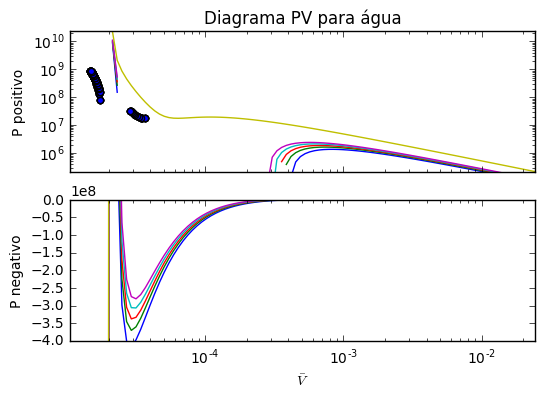

In [9]:
dadosexp293 = np.loadtxt('exp data volumes 293K.txt', dtype='float', comments='#', converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
V_exp293 = dadosexp293[:,0]
P_exp293 = dadosexp293[:,1]

dadosexp308 = np.loadtxt('exp data volumes 308K.txt', dtype='float', comments='#', converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
V_exp308 = dadosexp308[:,0]
P_exp308 = dadosexp308[:,1]

dadosexp323 = np.loadtxt('exp data volumes 323K.txt', dtype='float', comments='#', converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
V_exp323 = dadosexp323[:,0]
P_exp323 = dadosexp323[:,1]

dadosexp338 = np.loadtxt('exp data volumes 338K.txt', dtype='float', comments='#', converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
V_exp338 = dadosexp338[:,0]
P_exp338 = dadosexp338[:,1]

dadosexp633 = np.loadtxt('exp data volumes 633K.txt', dtype='float', comments='#', converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
V_exp633 = dadosexp633[:,0]
P_exp633 = dadosexp633[:,1]

for T in np.array([273.15, 293.15, 308.15, 323.15, 338.15, 633.19]):
#selecionam-se valores para T
    
    #selecionam-se valores para V, baseando-se na equação
    Vmi = np.exp(np.linspace(np.log((omega*R*Tc_wat)/(Pc_wat)*0.5),np.log((R*Tc_wat/Pc_wat)*100.),100))
    #np.linspace e np.log cria uma lista que é espaçada igualmente na escala logaritmica
    #np.exp traz a lista de volta a escla original.
    
    plt.figure(1)
    plt.subplot(211)
    plt.loglog(Vmi,P_EOS(T,Vmi,Tc_wat,Pc_wat,w_wat)) 
    plt.scatter(V_exp293,P_exp293, label='Exp')
    plt.scatter(V_exp308,P_exp308)
    plt.scatter(V_exp323,P_exp323)
    plt.scatter(V_exp338,P_exp338)
    plt.scatter(V_exp633,P_exp633)
    plt.ylabel('P positivo') 
    plt.title('Diagrama PV para água') 
    plt.ylim([P_EOS(T,(R*Tc_wat/Pc_wat)*100.,Tc_wat,Pc_wat,w_wat),
                            P_EOS(T,(omega*R*Tc_wat)/(Pc_wat)*1.01,Tc_wat,Pc_wat,w_wat)])
    plt.xlim([(omega*R*Tc_wat)/(Pc_wat)*0.5,(R*Tc_wat/Pc_wat)*100.])
    
    plt.tick_params( 
    axis='x',        
    which='both',    
    bottom='on',     
    top='on',        
    labelbottom='off') 

    plt.subplot(212) 

    plt.semilogx(Vmi,P_EOS(T,Vmi,Tc_wat,Pc_wat,w_wat)) #plot linear P vs log V

    plt.xlabel(r'$\bar{V}$') 
    plt.ylabel('P negativo') 
    plt.ylim([-400000000,0.])
    plt.xlim([(omega*R*Tc_wat)/(Pc_wat)*0.5,(R*Tc_wat/Pc_wat)*100.])
    
plt.show()

# Acetona!

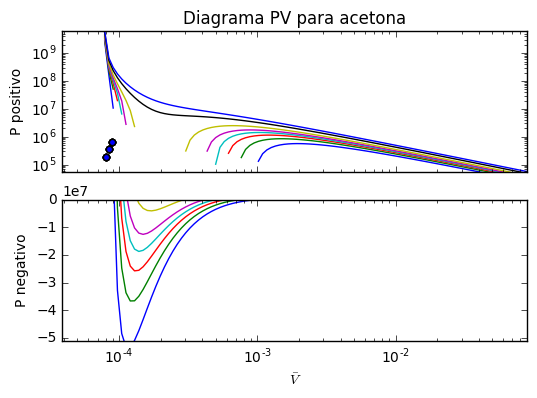

In [10]:
V_exp398 = 8.85999E-05
P_exp398 = 668745

V_exp373 = 8.39E-05
P_exp373 = 364770

V_exp348 = 8.03E-05
P_exp348 = 182385

#Dados da DDBST
for T in np.array([273.15, 314.94375, 348.15, 373.15, 398.15, 440.325, 523.9125,607.5]):
    #selecionam-se valores para T

    #selecionam-se valores para V, baseando-se na equação
    Vmi = np.exp(np.linspace(np.log((omega*R*Tc_ac)/(Pc_ac)*1.01),np.log((R*Tc_ac/Pc_ac)*100.),100))
    #np.linspace e np.log cria uma lista que é espaçada igualmente na escala logaritmica
    #np.exp traz a lista de volta a escla original.

    plt.figure(1) #activate a figure
    plt.subplot(211) #activate a subplot
    plt.loglog(Vmi,P_EOS(T,Vmi,Tc_ac,Pc_ac,w_ac)) 
    plt.scatter(V_exp348,P_exp348)
    plt.scatter(V_exp373,P_exp373)
    plt.scatter(V_exp398,P_exp398)
    plt.ylabel('P positivo') 
    plt.title('Diagrama PV para acetona') 
    plt.ylim([P_EOS(T,(R*Tc_ac/Pc_ac)*100.,Tc_ac,Pc_ac,w_ac),
                            P_EOS(T,(omega*R*Tc_ac)/(Pc_ac)*1.01,Tc_ac,Pc_ac,w_ac)])
    plt.xlim([(omega*R*Tc_ac)/(Pc_ac)*0.5,(R*Tc_ac/Pc_ac)*100.])

    plt.tick_params( 
    axis='x',        
    which='both',    
    bottom='on',     
    top='on',        
    labelbottom='off') 

    plt.subplot(212) 

    plt.semilogx(Vmi,P_EOS(T,Vmi,Tc_ac,Pc_ac,w_ac)) #plot linear P vs log V

    plt.xlabel(r'$\bar{V}$') 
    plt.ylabel('P negativo') 
    plt.ylim([-51000000,0.])
    plt.xlim([(omega*R*Tc_ac)/(Pc_ac)*0.5,(R*Tc_ac/Pc_ac)*100.])
        
plt.show()


# b) Gráficos log(P)xH e TxS:

In [11]:
#Vetores contendo as constantes para o cálculo de Cp ideal para gases, de a0 a a4 (PRAUZNITZ):
#Acetona (200<T<1000):
Cp_c_ac=np.array([5.126,1.511*10**-3,5.731*10**-5,-7.177*10**-8,2.728*10**-11])

#Água (50<T<1000):
Cp_c_wat=np.array([4.395,-4.186*10**-3,1.405*10**-5,-1.564*10**-8,0.632*10**-11])

In [12]:
def Z_EOS(T,P,Tc,Pc,w):
    Tr = T/Tc 
    alfa = (1+(0.48+1.574*w-0.176*w**2)*(1-(Tr**(1/2))))**2
    a = 0.42748*(alfa*(R**2)*(Tc**2)/Pc)
    b = 0.08664*R*Tc/Pc
    beta = b*P/(R*T)
    q = a/(b*R*T)
    A=a*P/(R*T)**2
    B=b*P/(R*T)
    c3=1
    c2=-1
    c1=A-B-B**2
    c0=-A*B
    Z = np.roots([c3,c2,c1,c0])
    Zans=[]
    for i in range(3):
        if np.isreal(Z[i])==1:  #selecionar os valores reais
            Zans=Zans+[Z[i]]    #constroi um vetor com raízes reais
        else:
            Zans=Zans+[float('nan')]
            #Os valores não-reais de Z serão chamados de nan. Dessa forma, eles são incluídos no cálculo das
            #propriedades e na construção do gráfico.
    Zans=np.real(Zans)          #conversão do tipo complexo para real
    Zansv=Zans[0] #Zliquido
    Zansm=Zans[1] #Zintermediario
    Zansl=Zans[2] #Zvapor
    
    return Zansv,Zansm,Zansl,Zans

def prop(T,P,Tc,Pc,w,Cp_c): #Função que calcula todas as propriedades
    def G_res(T,P):    
        Tr = T/Tc 
        alfa = (1+(0.48+1.574*w-0.176*w**2)*(1-(Tr**(1/2))))**2
        a = 0.42748*(alfa*(R**2)*(Tc**2)/Pc)
        b = 0.08664*R*Tc/Pc
        _,_,_,Z = Z_EOS(T,P,Tc,Pc,w)
        V = R*T*Z/P
        #print('V',V)
        G_res = R*T*((P*V)/(R*T)-1-np.log((P*V-b*P)/(R*T))-(a/(b*R*T))*np.log((V+b)/V))
        return G_res
    
    def H_ideal(T):
        Tref=273.15 #Temperatura de referência para cálculo do H ideal (Cp)
        H_ideal=R*(Cp_c[4]/5*(T**5-Tref**5)+Cp_c[3]/4*(T**4-Tref**4)+Cp_c[2]/3*(T**3-Tref**3)+Cp_c[1]/2*(T**2-Tref**2)+Cp_c[0]*(T-Tref))
        return H_ideal 
    
    def H_res(T,P):    
        dT=0.000001
        G_res_p=((G_res(T+dT,P))/(R*T)) #termo positivo T+dT
        G_res_n=((G_res(T-dT,P))/(R*T)) #termo negativo T-dT
        #print('Gp',G_res_p)
        #print('Gn',G_res_n)
        H_res=-(R*T**2)*((G_res_p-G_res_n)/(2*dT))   
        #print('H',H_res)
        return H_res

    def H_real(T,P):
        H_real=H_ideal(T)+H_res(T,P)
        return H_real
    
    def S_res(T,P):
        S_res=H_res(T,P)/T-G_res(T,P)/T
        return S_res

    def S_ideal(T,P):
        Pref=1*10**5 #Pa
        Tref=273.15 #K
        S_ideal=R*(Cp_c[4]/4*(T**4-Tref**4)+Cp_c[3]/3*(T**3-Tref**3)+Cp_c[2]/2*(T**2-Tref**2)+Cp_c[1]*(T-Tref)+Cp_c[0]*np.log(T/Tref))-R*np.log(P/Pref)    
        return S_ideal

    def S_real(T,P):
        S_real=S_ideal(T,P)+S_res(T,P)    
        return S_real
    Z=Z_EOS(T,P,Tc,Pc,w)
    
    H = H_real(T,P)
    S = S_real(T,P)
    return H,S

### Água!

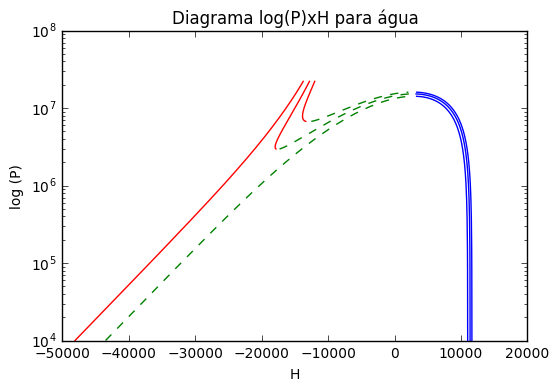

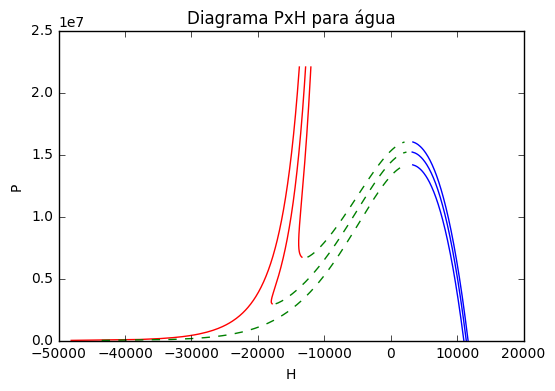

In [27]:
Paxis = np.linspace(10**4,Pc_wat,300)
Zaxisl = np.zeros((len(Paxis)))
Zaxism = np.zeros((len(Paxis)))
Zaxisv = np.zeros((len(Paxis)))
Haxis = np.zeros(((len(Paxis)),3))  #Matriz que compreende vapor, intermediário e líquido.

for T in np.array([590, 600, 607.5]):   
    for i in range(len(Paxis)):
        Zaxisv[i],Zaxism[i],Zaxisl[i],_ = Z_EOS(T,Paxis[i],Tc_wat,Pc_wat,w_wat)
        Haxis[i,:],_=prop(T,Paxis[i],Tc_wat,Pc_wat,w_wat,Cp_c_wat)
    
    Hl=Haxis[:,2]
    Hm=Haxis[:,1]
    Hv=Haxis[:,0]
    
    plt.figure(1) 
    plt.semilogy(Hl,Paxis,'r',Hm,Paxis,'g--',Hv,Paxis,'b') 
    plt.ylabel('log (P)') 
    plt.xlabel('H')
    plt.title('Diagrama log(P)xH para água') 
    
    plt.figure(2) 
    plt.plot(Hl,Paxis,'r',Hm,Paxis,'g--',Hv,Paxis,'b')  
    plt.ylabel('P') 
    plt.xlabel('H')
    plt.title('Diagrama PxH para água')    
    
plt.show()

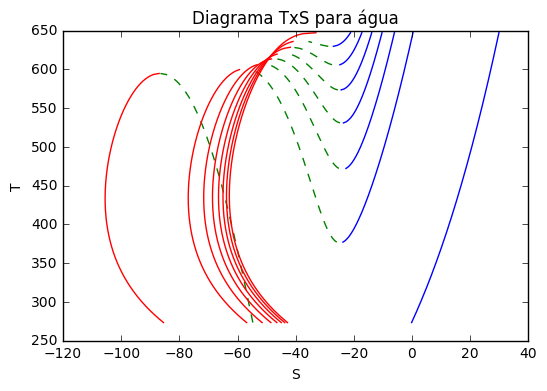

In [32]:
Taxis = np.linspace(273.15,Tc_wat,300)
Zaxisl = np.zeros((len(Taxis)))
Zaxism = np.zeros((len(Taxis)))
Zaxisv = np.zeros((len(Taxis)))
Saxis = np.zeros(((len(Taxis)),3))  #Matriz que compreende vapor, intermediário e líquido.

for P in np.linspace(10**5, Pc_wat+20, 8):    
    for i in range(len(Taxis)):
        Zaxisv[i],Zaxism[i],Zaxisl[i],_ = Z_EOS(Taxis[i],P,Tc_wat,Pc_wat,w_wat)
        _,Saxis[i,:]=prop(Taxis[i],P,Tc_wat,Pc_wat,w_wat,Cp_c_wat)
    
    Sl=Saxis[:,2]
    Sm=Saxis[:,1]
    Sv=Saxis[:,0]
    
    plt.figure(1) 
    plt.plot(Sl,Taxis,'r',Sm,Taxis,'g--',Sv,Taxis,'b')
    plt.ylabel('T') 
    plt.xlabel('S')
    plt.title('Diagrama TxS para água')    
    
plt.show()

## Acetona!

C:\Users\Fabiana Coelho\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: RuntimeWarning: overflow encountered in long_scalars
C:\Users\Fabiana Coelho\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: RuntimeWarning: overflow encountered in long_scalars


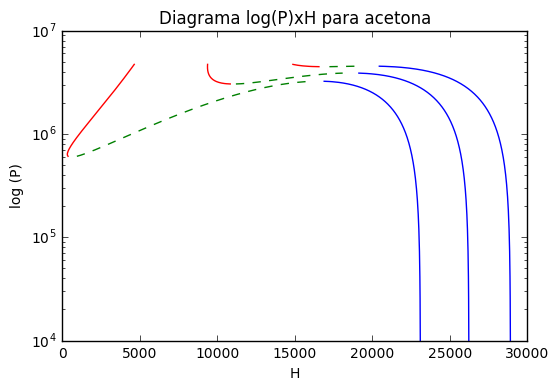

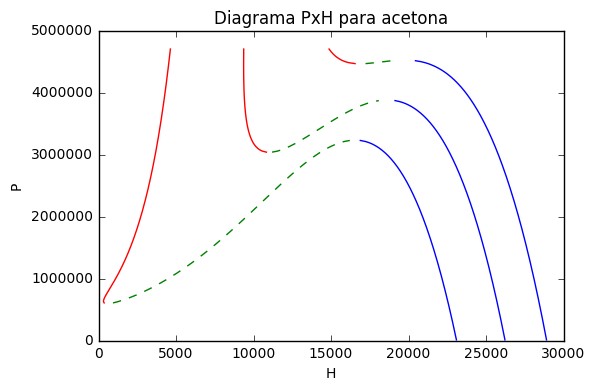

In [44]:
Paxis = np.linspace(10**4,Pc_ac,300)
Zaxisl = np.zeros((len(Paxis)))
Zaxism = np.zeros((len(Paxis)))
Zaxisv = np.zeros((len(Paxis)))
Haxis = np.zeros(((len(Paxis)),3))  #Matriz que compreende vapor, intermediário e líquido.

for T in np.array([470,490, 505]):  
#(273.15, Tc_ac+20, 8):    
    for i in range(len(Paxis)):
        Zaxisv[i],Zaxism[i],Zaxisl[i],_ = Z_EOS(T,Paxis[i],Tc_ac,Pc_ac,w_ac)
        Haxis[i,:],_=prop(T,Paxis[i],Tc_ac,Pc_ac,w_ac,Cp_c_ac)
    
    Hl=Haxis[:,2]
    Hm=Haxis[:,1]
    Hv=Haxis[:,0]
    
    plt.figure(1) 
    plt.semilogy(Hl,Paxis,'r',Hm,Paxis,'g--',Hv,Paxis,'b') 
    plt.ylabel('log (P)') 
    plt.xlabel('H')
    plt.title('Diagrama log(P)xH para acetona') 
    
    plt.figure(2) 
    plt.plot(Hl,Paxis,'r',Hm,Paxis,'g--',Hv,Paxis,'b')  
    plt.ylabel('P') 
    plt.xlabel('H')
    plt.title('Diagrama PxH para acetona')    
    
plt.show()

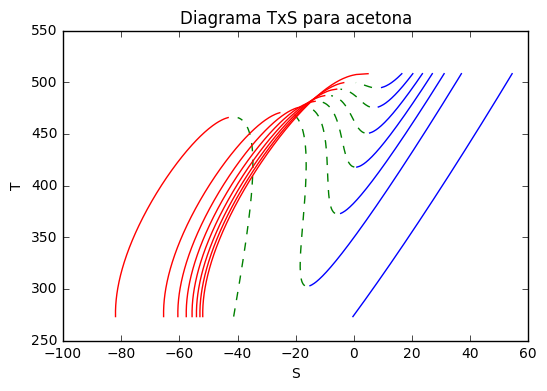

In [47]:
Taxis = np.linspace(273.15,Tc_ac,300)
Zaxisl = np.zeros((len(Taxis)))
Zaxism = np.zeros((len(Taxis)))
Zaxisv = np.zeros((len(Taxis)))
Saxis = np.zeros(((len(Taxis)),3))  #Matriz que compreende vapor, intermediário e líquido.

for P in np.linspace(10**5, Pc_ac+20, 8):    
    for i in range(len(Taxis)):
        Zaxisv[i],Zaxism[i],Zaxisl[i],_ = Z_EOS(Taxis[i],P,Tc_ac,Pc_ac,w_ac)
        _,Saxis[i,:]=prop(Taxis[i],P,Tc_ac,Pc_ac,w_ac,Cp_c_ac)
    
    Sl=Saxis[:,2]
    Sm=Saxis[:,1]
    Sv=Saxis[:,0]
    
    plt.figure(1) 
    plt.plot(Sl,Taxis,'r',Sm,Taxis,'g--',Sv,Taxis,'b')  
    plt.ylabel('T') 
    plt.xlabel('S')
    plt.title('Diagrama TxS para acetona')    
    
plt.show()

# Referências:
DDBST GmbH. Density of Acetone. Disponível em <http://www.ddbst.com/en/EED/PCP/DEN_C4.php>. Acessado em: 16/12/2016.

DDBST GmbH. Density of Water. Disponível em: <http://www.ddbst.com/en/EED/PCP/DEN_C174.php>. Acessado em: 10/12/2016.

DDBST GmbH. Vapor Pressure of Acetone. Disponível em: <http://www.ddbst.com/en/EED/PCP/VAP_C4.php>. Acessado em: 28/11/2016.

DDBST GmbH. Vapor Pressure of Water. Disponível em: <http://www.ddbst.com/en/EED/PCP/VAP_C174.php>. Acessado em: 28/11/2016.

GESTIS Substance Database. Acetone. Disponível em: <http://gestis-en.itrust.de/nxt/gateway.dll/gestis_en/011230.xml?f=templates$fn=default.htm$3.0>. Acessado em: 26/11/2016.

NIST - National Institute of Standards and Technology. Acetone. Disponível em: <http://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Mask=4&Type=ANTOINE&Plot=on>. Acessado em: 26/11/2016.

NIST - National Institute of Standards and Technology. Water. Disponível em: <http://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=4&Type=ANTOINE&Plot=on>. Acessado em: 26/11/2016.

PRAUSNITZ, J.M.; POLING, B.E.; O'CONNELL, J.P. The Properties of Gases and Liquids. 5 Edição, McGraw-Hill, 2001. 803 p.

TAVARES, F.W.; MEDEIROS, F. de A.; S. I.S.V. Termodinâmica da Engenharia Química - EQE 359.

VAN NESS, H.C.; SMITH, J.M.; ABBOTT, M.M. Introdução à Termodinâmica da Engenharia Química. 7 Edição. Rio de Janeiro, LTC, 2007. 626 p.
